# Exercise 3: Analysing Climate Model Data

### *geof212, Fall 2021*
### *Written by Etienne Dunn-Sigouin 21-09-01*


## Introduction

The goal of this exercise is to learn how to perform basic analyses of climate model data using a historical simulation from the Norwegian Earth System Model NorESM. The simulation is forced with greenhouse gasses, aerosols and volcanic eruptions etc .. from 1951-2005 to reproduce climate from the recent past. 

Completing this exercise will give you tools necessary to complete your final project. You will learn to read data, perform time and spatial averages and plot your results in different ways. Specifically, you will analyse the annual-mean top-of-the-atmosphere (toa) and surface (sfc) energy budgets, i.e., equations 2.21 and 4.1 in the Hartmann textbook, respectively: 

1. $$ \frac{\partial E_{ao}}{\partial t} = SW_{toa} + LW_{toa} + \nabla \cdot F_{ao} \approx  0$$

2. $$ \frac{\partial E_{o}}{\partial t}  = SW_{sfc} + LW_{sfc} + LH_{sfc} + SH_{sfc} + \nabla \cdot F_{o} \approx 0$$

where subscripts a and o refer the atmosphere and ocean, E to energy storage, SW and LW to short and longwave radiative fluxes, SH and LH to sensible and latent heat fluxes and F to energy transport. 


The exercise walks you through some of the tasks but leaves others for you to do in <font color=blue>**blue**</font>. In order to start this exercise, you must first log on to cyclone, open up this jupyter notebook file '03.python.exercise.ipynb' and make sure your python kernal/environment is set to 'geof212env'. Please refer back to exercise 0 for instructions on how to do this.

## 1. Calculating the top of the atmosphere energy budget

Import the necessary python packages to analyse the data and define the main directory where the data is stored on cyclone as shown below.

In [7]:
import numpy             as np
import matplotlib.pyplot as plt
import xarray            as xr
import cartopy
import cartopy.crs       as ccrs
%matplotlib inline 
datadir = '/Data/gfi/share/ModData/CMIP5_ATMOS/atmos/historical/'

### 1.1 Read the model data and calculate the annual-mean

The data are monthly means of toa outgoing longwave radiation (rlut), toa outgoing shortwave radiation (rsut) and toa incoming shortwave radiation (rsdt) as a function of latitude and longitude. You can read the data using xarray:

In [8]:
filename      = datadir + 'rlut' + '/mon/NorESM1-M/r1i1p1/rlut_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc'
ds1           = xr.open_dataset(filename)
LW_toa        = ds1.rlut 

Note that you can explore your data by printing the file's meta-data:

In [9]:
LW_toa

<xarray.DataArray 'rlut' (time: 1872, lat: 96, lon: 144)>
[25878528 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:     toa_outgoing_longwave_flux
    long_name:         TOA Outgoing Longwave Radiation
    comment:           at the top of the atmosphere (to be compared with sate...
    units:             W m-2
    original_name:     FLUT
    original_units:    W/m2
    history:           2011-06-01T10:01:00Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

You can calculate the annual-mean by averaging over your data's time dimension:

In [10]:
LW_toa = LW_toa.mean(dim='time')
LW_toa

<xarray.DataArray 'rlut' (lat: 96, lon: 144)>
array([[136.60767, 136.85234, 136.69641, ..., 136.82552, 136.57478,
        136.59875],
       [135.93698, 135.95654, 135.4691 , ..., 136.5335 , 136.33525,
        136.03296],
       [138.58986, 138.34073, 137.94786, ..., 139.96169, 139.45927,
        138.94844],
       ...,
       [185.79544, 185.8199 , 185.85527, ..., 185.62743, 185.67912,
        185.74472],
       [185.31754, 185.30768, 185.29906, ..., 185.29805, 185.30074,
        185.29668],
       [185.80402, 185.79614, 185.79198, ..., 185.77556, 185.79295,
        185.80313]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

<font color=blue> Read incoming and outgoing shortwave radiation, calculate the annual-mean and define a new variable for net toa shortwave radiation: SH_toa = rsdt - rsut

### 1.2 Plot the data as a function of latitude and longitude
You can plot data with different global map projections using xarray and cartopy: 

Text(0.5, 1.0, 'Annual-mean TOA net longwave radiation')

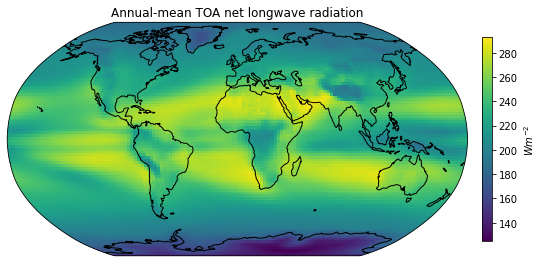

In [11]:
fig = plt.figure(figsize=(10,5))
ax  = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
LW_toa.plot(ax=ax, transform=ccrs.PlateCarree(),
            cbar_kwargs=dict(orientation='vertical',pad=0.025, shrink=0.75, label='$Wm^{-2}$'))
plt.title("Annual-mean TOA net longwave radiation")

<font color=blue> Plot net shortwave radiation. 
    
<font color=blue> Try out different map projections by looking up the cartopy documentation. To check that you've calculated and plotted the data correctly, compare your plots with observed data in Figs. 2.10a and 2.11a from the Hartmann textbook.

### 1.3 Calculate the zonal-mean and plot the data as a function of latitude 
You can calculate the zonal-mean by averaging over the longitude dimension of your data

In [12]:
LW_toa_zmean = LW_toa.mean(dim='lon')

Text(0, 0.5, '$Wm^{-2}$')

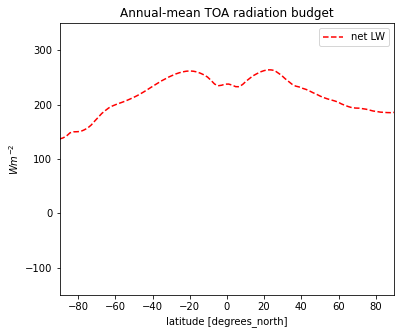

In [13]:
plt.figure(figsize=(6,5))
LW_toa_zmean.plot.line(color='r',linestyle='--',label='net LW',ylim=[-150,350],xlim=[-90,90])
plt.legend()
plt.title("Annual-mean TOA radiation budget")
plt.ylabel('$Wm^{-2}$')

<font color=blue> Calculate the zonal-mean of toa net shortwave radiation and repeat the above plot with 1) LW radiation, SW radiation and 3) their difference.
    
<font color=blue> As a check, compare your new plot with observations in Fig. 2.12 from the Hartmann textbook. Note that that calculating the difference between net LW and SW radiation implies you've indirectly calculated the divergence of the atmospheric and oceanic energy transport $\nabla \cdot F$ following equation 1 above.

### 1.4 Calculate the global-mean and balance the top of the atmosphere radiation budget
According to equation 1) above, net SW and LW radiation should be equal averaged over the globe since the global average of the divergence of the transport $\nabla \cdot F \approx 0$. Therefore, calculating the global mean of toa radiation is a good way to check whether you've calculated your energy budget correctly.

Since you've already calculated the zonal-mean, all that is left to do to calculate the global-mean is the meridional average. The meridional average needs to be calculated a bit differently because you need to take into account the convergence of longitude lines toward the poles. Specifically, you need to calculate a weighted average proportional to the surface area. For example:

$$
\frac{\sum_{-\pi/2}^{\pi/2} LW_{toa} \cos \theta }{\sum_{-\pi/2}^{\pi/2}\cos \theta}
$$

You can use numpy to calculate weighted averages:

In [14]:
lat          = np.deg2rad(ds1.lat) # get grid latitudes from dataset & convert to radians
weights      = np.cos(lat)
LW_toa_gmean = np.average(LW_toa_zmean,axis=0,weights=weights)

<font color=blue> Calculate the global-mean of net SW radiation and show that global-mean $SW_{toa} - LW_{toa} \approx 0$. Note that in practice budgets can be hard to close and so you can expect some differences. The key point is that the difference is small compared to the individual terms.  

## 2. Calculating the surface energy budget

<font color=blue> Now that you have learned to do some basic climate model analysis with python, next you will repeat the above analysis except for the surface energy budget (equation 2 above). Specifically,

<font color=blue> 1. Read all variables included in the surface energy budget and calculate their time-average: sensible heat flux (hfss), latent heat flux (hfls), net shortwave radiation (rsus minus rsds) and net longwave radiation (rlus minus rlds). Here, combine net SW and LW together to form a single variable called $R_{sfc}$ 

<font color=blue> 2. Plot each term as a function of latitude and longitude. Compare your plot with observations in Fig. 4.19 in the Hartmann textbook. Note that Fig. 4.19a has the wrong sign 

<font color=blue> 3. Calculate the zonal-mean of each variable and plot them as a function of latitude in the same figure. Also plot the sum of all terms, which is equal to $\nabla \cdot F_{o}$ following equation 2. Compare your plot with observations in Fig. 4.18 in the Hartmann textbook. 

<font color=blue> 4. Calculate the global-mean of each variable and confirm that global-mean $R_{sfc} + LH_{sfc} + SH_{sfc} \approx 0$ 